In [235]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [96]:
df = pd.read_csv('./galaxies.csv')
points = df.values

In [97]:
df

,X,Y
0,6.649504,2.223293
1,5.260232,-7.556045
2,6.164551,9.245618
3,5.033345,9.002009
4,3.674350,-7.836118
...,...,...
995,4.963106,-7.547204
996,6.147833,-8.742696
997,4.722672,9.892131
998,6.333305,2.750708


In [244]:
model = KMeans(n_clusters=3,init='k-means++')

In [246]:
model.fit(points)
labels = model.predict(points)

In [100]:
def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []
    for i in range(labels.shape[0]):
        if labels[i] == 0:
            data_0.append(points[i]) 
        elif labels[i] == 1:
            data_1.append(points[i]) 
        else:
            data_2.append(points[i]) 
    # YOUR CODE HERE
    return np.array(data_0),np.array(data_1),np.array(data_2)


data_0,data_1,data_2 =separate_labels(labels, points)


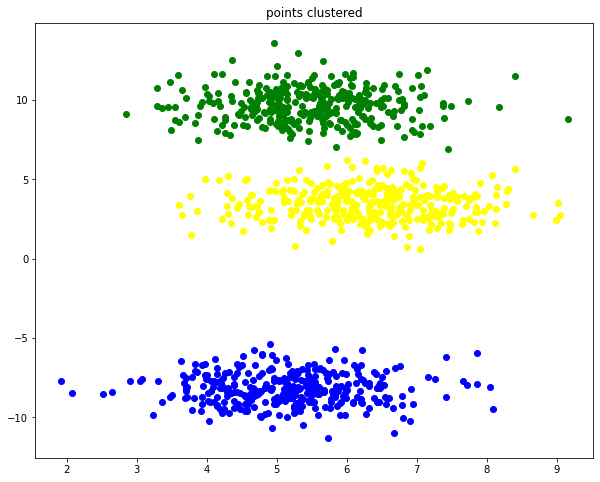

In [101]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(data_0[:,0],data_0[:,1], color ='yellow')
plt.scatter(data_1[:,0],data_1[:,1], color ='blue')
plt.scatter(data_2[:,0],data_2[:,1], color ='green')
plt.title('points clustered')
plt.show()

In [102]:
centroids = model.cluster_centers_
centroids
centroids_max_index = np.argmax(centroids,axis=0)
print('Max values index for x & y is:',centroids_max_index)
uppermost_galaxy_index = centroids_max_index[1]
print(uppermost_galaxy_index) 
uppermost_centroids = centroids[uppermost_galaxy_index]
print('Uppermost Galaxy has the centroid coordinates:',uppermost_centroids)
galaxy_list= [data_0,data_1,data_2]
uppermost_galaxy = galaxy_list[uppermost_galaxy_index]

Max values index for x & y is: [0 2]
2
Uppermost Galaxy has the centroid coordinates: [5.46605246 9.68163004]


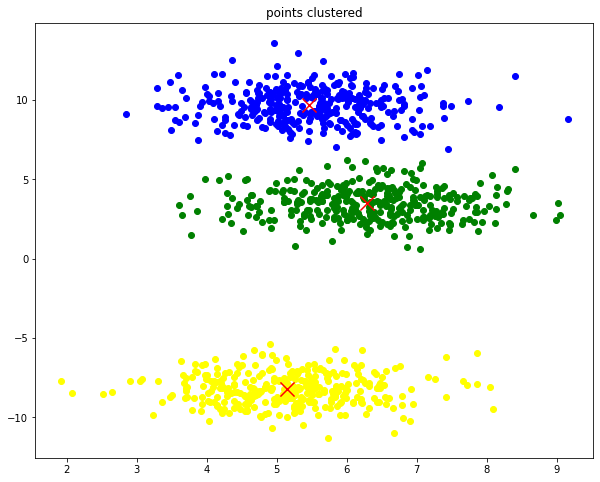

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(data_0[:,0],data_0[:,1], color ='yellow')
plt.scatter(data_1[:,0],data_1[:,1], color ='blue')
plt.scatter(data_2[:,0],data_2[:,1], color ='green')
plt.scatter(centroids_x,centroids_y,marker='x',s=200,c='r')
plt.title('points clustered')
plt.show()

In [64]:
new_centroids = centroids[uppermost_galaxy_index]
new_centroids_x = new_centroids[0]
new_centroids_y = new_centroids[1]

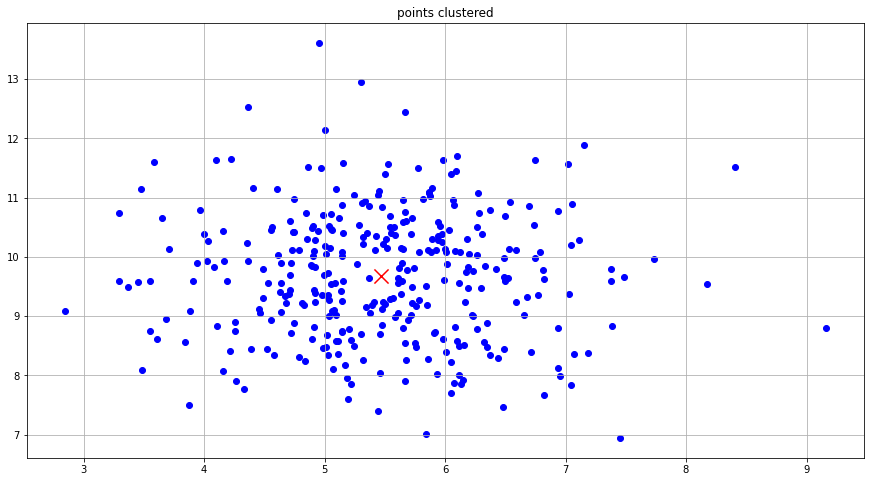

In [91]:
fig, ax = plt.subplots(figsize=(15,8))

plt.scatter(uppermost_galaxy [:,0],uppermost_galaxy [:,1], color ='blue')
plt.scatter(new_centroids_x,new_centroids_y,marker='x',s=200,c='r')
plt.title('points clustered')
plt.grid()
plt.show()

In [106]:
max_planets_x_y_index = np.argmax(uppermost_galaxy,axis=0)
print('Index for Max values in x & y:',max_planets_x_y_index)
max_x_index = max_planets_x_y_index[0]
rightmost_planet = new_galaxy[max_x_index]
print('Planet rightmost coordinates:',rightmost_planet)

Index for Max values in x & y: [62 94]
Planet rightmost coordinates: [9.16085726 8.80725863]


In [ ]:
########### planet

In [109]:
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [129]:
df_planet = pd.read_csv('./planet.csv')

In [130]:
df_planet

,X,Y,Z,Temp,climate
0,-10.577706,2.279242,-0.865452,-8.438929,-9.494053
1,-7.427127,0.176410,-5.588608,-5.443329,-3.629749
2,-7.590300,7.121962,8.955229,-7.675402,8.909423
3,-8.850700,4.544747,0.616561,-7.159618,-8.560698
4,4.680549,-8.821567,5.156382,8.154624,9.046185
...,...,...,...,...,...
995,5.313976,-8.775129,2.065525,7.901965,6.990933
996,-9.316573,4.974909,-1.943240,-7.028983,-8.563712
997,-8.545896,4.169545,1.010724,-7.123091,-8.546803
998,9.981502,2.486857,4.064346,-10.852408,-1.508750


In [131]:
X = df_planet.values

In [132]:
scaler = StandardScaler()
#transform data
X_scaled = scaler.fit_transform(X)

In [133]:
pca = PCA()

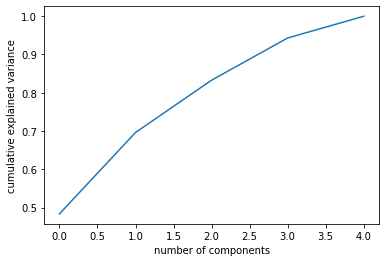

PCA()

In [146]:
# Run the PCA model here
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()
pca_5 = PCA(n_components=5) #0.98 percentage 
pca.fit(X)

In [147]:
print(pca.explained_variance_) # one i needed
print(pca.components_) #4 most

[112.75705472  49.66267401  31.91567926  25.73359908  13.25473868]
[[-0.64531415  0.34145889  0.23066064 -0.52887531 -0.36614485]
 [-0.14735849 -0.0109763   0.72638494  0.02515454  0.67074374]
 [-0.43913491  0.53820567 -0.26713625  0.64392106  0.17747979]
 [ 0.57365108  0.76666589  0.03651036 -0.26446943  0.108953  ]
 [-0.19985017 -0.07644217 -0.58861346 -0.48485023  0.61046781]]


<AxesSubplot:xlabel='PC', ylabel='var'>

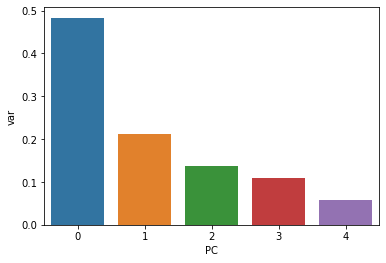

In [148]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_, 'PC': ['0','1','2','3','4']})
sns.barplot(x = 'PC', y='var', data=df)

In [162]:
pca_bc = PCA(n_components=2)
principalComponents_planets = pca_bc.fit_transform(X)

In [215]:
df_planets_new = pd.DataFrame(principalComponents_planets)
display(df_planets_new)
center_point =[df_planets_new.iloc[:,0].mean(),df_planets_new.iloc[:,1].mean()]
center = np.array(center_point)
center = center.reshape(1,2)
index , distance = pairwise_distances_argmin_min(center,df_planets_new)
baby_yodas_planet = (df_planets_new[0].iloc[index].values,df_planets_new[1].iloc[index].values)

,0,1
0,15.220699,-6.287647
1,7.648626,-6.150861
2,10.069570,12.715796
3,14.203317,-4.832268
4,-12.591472,8.813087
...,...,...
995,-12.811168,5.089182
996,13.992403,-6.626476
997,13.945020,-4.576512
998,1.514206,-0.443186


In [211]:
center

array([[1.42108547e-16, 4.26325641e-16]])

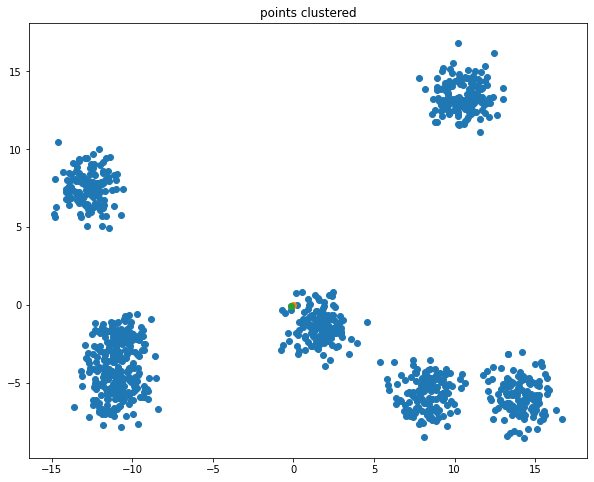

In [216]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(df_planets_new.iloc[:,0],df_planets_new.iloc[:,1])
plt.scatter(center_point[0],center_point[1])
plt.scatter(baby_yodas_planet[0],baby_yodas_planet[1])
plt.title('points clustered')
plt.show()

In [224]:
#### K-Mean
df = pd.read_csv('./galaxies.csv')
data = df.values

In [225]:
data

array([[ 6.6495042 ,  2.22329303],
       [ 5.26023173, -7.55604453],
       [ 6.16455103,  9.245618  ],
       ...,
       [ 4.72267172,  9.89213055],
       [ 6.3333054 ,  2.75070814],
       [ 7.27556108,  4.52131678]])

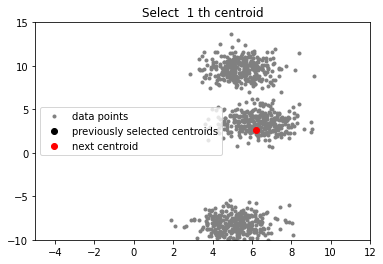

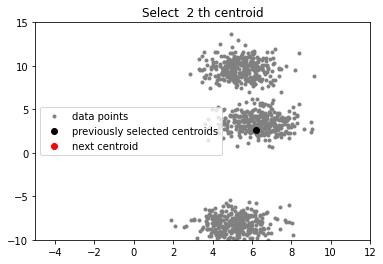

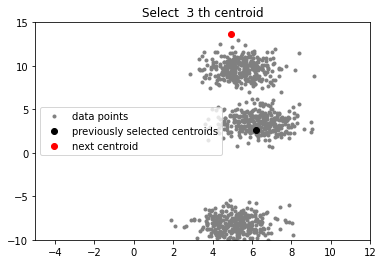

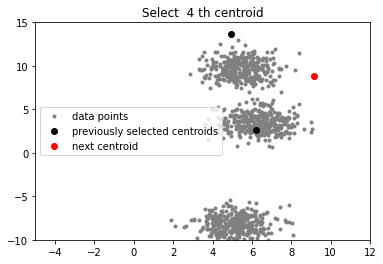

In [243]:
init='k-means++')